# ML Project: COVID-19 Mortality Rate Prediction.
Fall Semester 2020/2021

## Author: Ahmad Arrabi                                                                                                              
ID: 20170534

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Preprocessing and Data Cleaning

Load the dataset that was created previously

In [2]:
countries_data=pd.read_csv('COVID dataset/Full data mortality2.csv')
countries_data.drop('index',axis='columns', inplace=True)
countries_data

,Country,Population,Density,date,total_cases,extreme_poverty,human_development_index,hospital_beds_per_thousand,continent,reproduction_rate,...,Climate,Tourism,Date_FirstConfirmedCase,Latitude,Longtitude,Lockdown_Date,Lockdown_Type,GDP 2018,HF score 2017,literacy rate
0,Argentina,45267449,17,2021-03-29,2322611.0,0.6,0.845,5.000,South America,1.28,...,3.0,6942000.0,2020-03-04,-38.416097,-63.616672,2020-03-20,Full,20610.56855,6.86,98.1
1,Austria,9015361,109,2021-03-29,539541.0,0.7,0.922,7.370,Europe,1.06,...,3.0,30816000.0,2020-02-26,47.516231,14.550072,2020-03-16,Full,55454.68929,8.48,NaN
2,Bahrain,1711057,2239,2021-03-29,142669.0,NaN,0.852,2.000,Asia,1.12,...,1.0,12045000.0,2020-02-25,25.930414,50.637772,2020-02-25,Full,47303.04851,6.63,95.7
3,Belgium,11598451,383,2021-03-29,872936.0,0.2,0.931,5.640,Europe,1.08,...,3.0,9119000.0,2020-02-05,50.503887,4.469936,2020-03-17,Full,51407.99834,8.29,NaN
4,Chile,19144605,26,2021-03-29,984484.0,1.3,0.851,2.110,South America,1.11,...,3.0,5723000.0,2020-03-04,-35.675147,-71.542969,2020-03-26,Full,25222.52778,8.15,97.3
5,Croatia,4100719,73,2021-03-29,267522.0,0.7,0.851,5.540,Europe,1.37,...,3.0,16645000.0,2020-02-26,45.100000,15.200000,2020-03-22,Partial,27579.78083,7.86,99.3
6,Estonia,1326693,31,2021-03-29,104214.0,0.5,0.892,4.690,Europe,0.83,...,3.0,3234000.0,2020-02-28,58.595272,25.013607,2020-03-13,Full,35973.77646,8.46,99.8
7,France,65298930,119,2021-03-29,4615295.0,NaN,0.901,5.980,Europe,1.14,...,4.0,89322000.0,2020-01-25,46.227638,2.213749,2020-03-16,Full,45342.39574,8.02,NaN
8,Georgia,3987805,57,2021-03-29,280472.0,4.2,0.812,2.600,Asia,1.18,...,3.0,4757000.0,2020-02-27,42.315407,43.356892,2020-03-22,Partial,12004.57383,7.74,99.8
9,Hungary,9655983,107,2021-03-29,641124.0,0.5,0.854,7.020,Europe,0.99,...,3.0,17552000.0,2020-03-05,47.162494,19.503304,2020-03-16,Full,31102.50275,7.65,99.1


In [3]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     28 non-null     object 
 1   Population                  28 non-null     int64  
 2   Density                     28 non-null     int64  
 3   date                        28 non-null     object 
 4   total_cases                 28 non-null     float64
 5   extreme_poverty             21 non-null     float64
 6   human_development_index     28 non-null     float64
 7   hospital_beds_per_thousand  28 non-null     float64
 8   continent                   28 non-null     object 
 9   reproduction_rate           28 non-null     float64
 10  total_deaths                28 non-null     float64
 11  stringency_index            24 non-null     float64
 12  median_age                  28 non-null     float64
 13  aged_70_older               27 non-nu

### Preparing Data for ML Model

Notice that the feature 'Date' is considered an object so change it to datetime data type. 

Change population and density to float as they are considered integers.

In [4]:
#countries_data['Date to reach 1%']=countries_data['Date to reach 1%'].apply(pd.to_datetime)
countries_data['Date_FirstConfirmedCase']=countries_data['Date_FirstConfirmedCase'].apply(pd.to_datetime)
countries_data['Lockdown_Date']=countries_data['Lockdown_Date'].apply(pd.to_datetime)
countries_data['Population']=countries_data['Population'].astype(float)
countries_data['Density']=countries_data['Density'].astype(float)

Calculate both time for spread and time for lockdown:
    $$T_{spread} = Date_{covid\ cases\ reach\  1\%\ population} -Date_{first\ covid \ case}$$
    $$T_{lockdown} = Date_{lockdown} -Date_{first\ covid \ case}$$
 Then, change the data type to datetime

In [5]:
#time_for_spread=countries_data['Date to reach 1%']-countries_data['Date_FirstConfirmedCase']
#countries_data['time for spread']=time_for_spread
#countries_data['time for spread']=countries_data['time for spread'].astype('timedelta64[D]')

time_for_lockdown=countries_data['Lockdown_Date']-countries_data['Date_FirstConfirmedCase']
countries_data['time for lockdown']=time_for_lockdown
countries_data['time for lockdown']=countries_data['time for lockdown'].astype('timedelta64[D]')
countries_data.drop('Lockdown_Date',axis='columns', inplace=True) #we don't need lockdown date now
countries_data.drop('date',axis='columns', inplace=True) #we changed from Date to reach 1% to date
countries_data.drop('Date_FirstConfirmedCase',axis='columns', inplace=True)

In [6]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     28 non-null     object 
 1   Population                  28 non-null     float64
 2   Density                     28 non-null     float64
 3   total_cases                 28 non-null     float64
 4   extreme_poverty             21 non-null     float64
 5   human_development_index     28 non-null     float64
 6   hospital_beds_per_thousand  28 non-null     float64
 7   continent                   28 non-null     object 
 8   reproduction_rate           28 non-null     float64
 9   total_deaths                28 non-null     float64
 10  stringency_index            24 non-null     float64
 11  median_age                  28 non-null     float64
 12  aged_70_older               27 non-null     float64
 13  cardiovasc_death_rate       28 non-nu

In [7]:
countries_data.loc[countries_data['time for lockdown']<0]['time for lockdown']

Series([], Name: time for lockdown, dtype: float64)

In [8]:
#countries_data.loc[[0], 'time for lockdown']=0          #2% 
#countries_data.loc[[0,46,57], 'time for lockdown']=0   #1%
#comment all in 5%
#countries_data.loc[[0,27,54,66,95], 'time for lockdown']=0 #obly 0.005%
#countries_data.loc[[1,19,46,88,96,99,103,108,143,157,160], 'time for lockdown']=0 #all ccountries
#countries_data.loc[[0,12,26,59,62,64,91,92], 'time for lockdown']=0 #high FH score

In [9]:
countries_data.loc[countries_data['time for lockdown']<0]['time for lockdown']

Series([], Name: time for lockdown, dtype: float64)

In [10]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     28 non-null     object 
 1   Population                  28 non-null     float64
 2   Density                     28 non-null     float64
 3   total_cases                 28 non-null     float64
 4   extreme_poverty             21 non-null     float64
 5   human_development_index     28 non-null     float64
 6   hospital_beds_per_thousand  28 non-null     float64
 7   continent                   28 non-null     object 
 8   reproduction_rate           28 non-null     float64
 9   total_deaths                28 non-null     float64
 10  stringency_index            24 non-null     float64
 11  median_age                  28 non-null     float64
 12  aged_70_older               27 non-null     float64
 13  cardiovasc_death_rate       28 non-nu

### Dealing with NULL values

Drop 'handwashing facilities' feature as it's mostly NULL values.

In [11]:
#countries_data.drop('handwashing_facilities',axis='columns', inplace=True)

We calculated the mean of each feature based on the continent of the country. Then, filled the NULL values with these averages.   

In [12]:
continent_mean=countries_data.groupby(['continent']).mean()
continent_mean

,Population,Density,total_cases,extreme_poverty,human_development_index,hospital_beds_per_thousand,reproduction_rate,total_deaths,stringency_index,median_age,...,life_expectancy,mortality_rate,Climate,Tourism,Latitude,Longtitude,GDP 2018,HF score 2017,literacy rate,time for lockdown
continent,,,,,,,,,,,,,,,,,,,,,
Asia,4.792460e+06,898.666667,4.184220e+05,2.35,0.86100,2.530000,0.916667,3492.333333,57.406667,33.900000,...,78.010000,0.008160,2.333333,6.974333e+06,33.097291,42.948759,33075.597330,7.326667,97.750000,14.333333
Europe,1.796199e+07,206.428571,1.202223e+06,0.64,0.89419,4.766905,1.037619,28133.857143,67.810588,42.957143,...,80.389048,0.019143,3.055556,2.077787e+07,48.280750,12.084809,43551.895607,8.166667,98.538462,21.200000
North America,1.678337e+08,47.000000,1.534332e+07,1.70,0.87050,2.535000,1.000000,278177.000000,67.825000,34.000000,...,78.685000,0.017688,2.500000,4.076546e+07,22.814111,-88.247509,44174.141180,8.075000,95.000000,13.500000
South America,3.220603e+07,21.500000,1.653548e+06,0.95,0.84800,3.555000,1.195000,39340.500000,75.465000,33.650000,...,78.425000,0.023688,3.000000,6.332500e+06,-37.045622,-67.579820,22916.548165,7.505000,97.700000,19.000000


Countries that have the value 'Oceania' as their continent are nearly all NULL values. We dropped them by locating their index.

In [13]:
countries_data.loc[countries_data['continent']=='Oceania']

,Country,Population,Density,total_cases,extreme_poverty,human_development_index,hospital_beds_per_thousand,continent,reproduction_rate,total_deaths,...,mortality_rate,Climate,Tourism,Latitude,Longtitude,Lockdown_Type,GDP 2018,HF score 2017,literacy rate,time for lockdown


In [14]:
#countries_data=countries_data.drop([24,28]) #2 instances with nearly all NAN values #comment when using 2%

In [15]:
#Africa=countries_data.loc[countries_data['continent']=='Africa']
Asia=countries_data.loc[countries_data['continent']=='Asia']
Europe=countries_data.loc[countries_data['continent']=='Europe']
North_America=countries_data.loc[countries_data['continent']=='North America']
South_America=countries_data.loc[countries_data['continent']=='South America']
#Oceania=countries_data.loc[countries_data['continent']=='Oceania'] #using all countries leads to more continents

#Africa=Africa.fillna(value=continent_mean.loc['Africa'], axis=None, inplace=False, limit=None, downcast=None)
Asia=Asia.fillna(value=continent_mean.loc['Asia'], axis=None, inplace=False, limit=None, downcast=None)
Europe=Europe.fillna(value=continent_mean.loc['Europe'], axis=None, inplace=False, limit=None, downcast=None)
North_America=North_America.fillna(value=continent_mean.loc['North America'], axis=None, inplace=False, limit=None, downcast=None)
South_America=South_America.fillna(value=continent_mean.loc['South America'], axis=None, inplace=False, limit=None, downcast=None)
#Oceania=Oceania.fillna(value=continent_mean.loc['Oceania'], axis=None, inplace=False, limit=None, downcast=None)

We still have categorical null values (Lockdown Type), so we'll fill it with the most frequent value of each continent. 

In [16]:
#print("North America:\n",North_America['Lockdown_Type'].value_counts(), "\n \nEurope:\n",Europe['Lockdown_Type'].value_counts())
#print("Asia:\n",Asia['Lockdown_Type'].value_counts())
#print("South America:\n",South_America['Lockdown_Type'].value_counts())
#print("Africa:\n",Africa['Lockdown_Type'].value_counts())
#print("Oceania:\n",Oceania['Lockdown_Type'].value_counts())

In [17]:
North_America['Lockdown_Type']=North_America['Lockdown_Type'].fillna('Full')
Europe['Lockdown_Type']=Europe['Lockdown_Type'].fillna('Full')
Asia['Lockdown_Type']=Asia['Lockdown_Type'].fillna('Full')
South_America['Lockdown_Type']=South_America['Lockdown_Type'].fillna('Full')
#Africa['Lockdown_Type']=Africa['Lockdown_Type'].fillna('Full')

In [18]:
#Oceania['literacy rate'] = 88

Concatenate the continents subsets to get the new full dataset with no NULL values

In [19]:
#countries_data=pd.concat([Africa, Asia, Europe, North_America, South_America, Oceania], sort=False) #remove Oceania if not necessiry
countries_data=pd.concat([Asia, Europe, North_America, South_America], sort=False)

Climate feature shouldn't have any fractions, only whole numbers (1 - 4), so we applied floor. 

In [20]:
countries_data['Climate']=countries_data['Climate'].apply(np.floor) 

No NULL values exist now !

In [21]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 2 to 4
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     28 non-null     object 
 1   Population                  28 non-null     float64
 2   Density                     28 non-null     float64
 3   total_cases                 28 non-null     float64
 4   extreme_poverty             28 non-null     float64
 5   human_development_index     28 non-null     float64
 6   hospital_beds_per_thousand  28 non-null     float64
 7   continent                   28 non-null     object 
 8   reproduction_rate           28 non-null     float64
 9   total_deaths                28 non-null     float64
 10  stringency_index            28 non-null     float64
 11  median_age                  28 non-null     float64
 12  aged_70_older               28 non-null     float64
 13  cardiovasc_death_rate       28 non-nul

In [22]:
import seaborn as sns

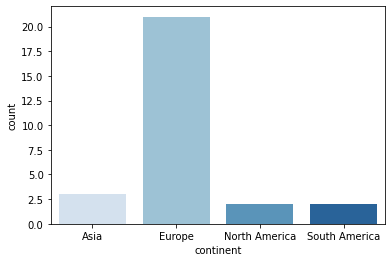

In [23]:
plt.figure()
sns.countplot(x='continent', data=countries_data, palette='Blues')
plt.show()


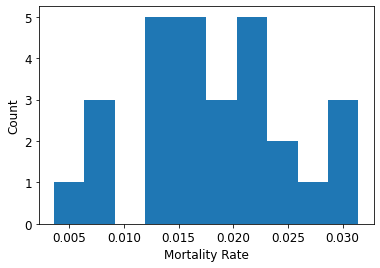

In [26]:
countries_data['mortality_rate'].hist()

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.xlabel('Mortality Rate')
plt.grid()
plt.ylabel('Count')
plt.show()

### Dealing With Categorical Data

Three categorical features exist in the dataset: climate, lockdown type, and continent.

We used one hot encoder to transform these features to numerical values.

In [46]:
countries_data=countries_data.reset_index()
countries_data.drop('index',axis='columns', inplace=True)

In [47]:
countries_data

,Country,Population,Density,total_cases,extreme_poverty,human_development_index,hospital_beds_per_thousand,continent,reproduction_rate,total_deaths,...,mortality_rate,Climate,Tourism,Latitude,Longtitude,Lockdown_Type,GDP 2018,HF score 2017,literacy rate,time for lockdown
0,Bahrain,1711057.0,2239.0,142669.0,2.35,0.852,2.000,Asia,1.12,515.0,...,0.003610,1.0,12045000.0,25.930414,50.637772,Full,47303.04851,6.63,95.700000,0.0
1,Georgia,3987805.0,57.0,280472.0,4.20,0.812,2.600,Asia,1.18,3765.0,...,0.013424,3.0,4757000.0,42.315407,43.356892,Partial,12004.57383,7.74,99.800000,24.0
2,Israel,8678517.0,400.0,832125.0,0.50,0.919,2.990,Asia,0.45,6197.0,...,0.007447,3.0,4121000.0,31.046051,34.851612,Full,39919.16965,7.61,97.750000,19.0
3,Austria,9015361.0,109.0,539541.0,0.70,0.922,7.370,Europe,1.06,9275.0,...,0.017191,3.0,30816000.0,47.516231,14.550072,Full,55454.68929,8.48,98.538462,19.0
4,Belgium,11598451.0,383.0,872936.0,0.20,0.931,5.640,Europe,1.08,22921.0,...,0.026257,3.0,9119000.0,50.503887,4.469936,Full,51407.99834,8.29,98.538462,41.0
5,Croatia,4100719.0,73.0,267522.0,0.70,0.851,5.540,Europe,1.37,5911.0,...,0.022095,3.0,16645000.0,45.100000,15.200000,Partial,27579.78083,7.86,99.300000,25.0
6,Estonia,1326693.0,31.0,104214.0,0.50,0.892,4.690,Europe,0.83,879.0,...,0.008435,3.0,3234000.0,58.595272,25.013607,Full,35973.77646,8.46,99.800000,14.0
7,France,65298930.0,119.0,4615295.0,0.64,0.901,5.980,Europe,1.14,95114.0,...,0.020608,4.0,89322000.0,46.227638,2.213749,Full,45342.39574,8.02,98.538462,51.0
8,Hungary,9655983.0,107.0,641124.0,0.50,0.854,7.020,Europe,0.99,20161.0,...,0.031446,3.0,17552000.0,47.162494,19.503304,Full,31102.50275,7.65,99.100000,11.0
9,Italy,60446035.0,206.0,3544957.0,2.00,0.892,3.180,Europe,0.93,108350.0,...,0.030565,3.0,61567200.0,41.871940,12.567380,Full,41830.42633,8.04,99.200000,39.0


In [48]:
#---------------------------------------------------------#
climate
from sklearn.preprocessing import LabelBinarizer
climate = countries_data["Climate"]
encoder_climate = LabelBinarizer()
climate_1hot = encoder_climate.fit_transform(climate)

climate_1hot=pd.DataFrame(data=climate_1hot,columns=["Dry", "Wet tropical","humid subtropical","wet winters"])
countries_data= pd.concat([countries_data, climate_1hot], axis=1, sort=False)
countries_data.drop('Climate',axis='columns', inplace=True)
#----------------------------------------------------------#
#lockdown Type
from sklearn.preprocessing import LabelEncoder
encoder_lockdown = LabelEncoder()
lockdown = countries_data["Lockdown_Type"]
lockdown_encoded = encoder_lockdown.fit_transform(lockdown)

from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder(sparse=False)
lockdown_1hot = encoder2.fit_transform(lockdown_encoded.reshape(-1,1))

lockdown_1hot = pd.DataFrame(data=lockdown_1hot,columns=["Full lockdown", "Partial lockdown"])
countries_data= pd.concat([countries_data, lockdown_1hot], axis=1, sort=False)
countries_data.drop('Lockdown_Type',axis='columns', inplace=True)
#-----------------------------------------------------------#
#continent
encoder_continent = LabelEncoder()
continent = countries_data["continent"]
continent_encoded = encoder_continent.fit_transform(continent)

encoder2_continent = OneHotEncoder(sparse=False)
continent_1hot = encoder2_continent.fit_transform(continent_encoded.reshape(-1,1))

#continent_1hot = pd.DataFrame(data=continent_1hot,columns=["Africa","Asia","Europe","North America","South America","Oceania"]) #remove oceania
continent_1hot = pd.DataFrame(data=continent_1hot,columns=["Asia","Europe","North America","South_America"])

countries_data= pd.concat([countries_data, continent_1hot], axis=1, sort=False)
countries_data.drop('continent',axis='columns', inplace=True)

NameError: name 'climate' is not defined

### Feature Scaling

In [502]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     28 non-null     object 
 1   Population                  28 non-null     float64
 2   Density                     28 non-null     float64
 3   total_cases                 28 non-null     float64
 4   extreme_poverty             28 non-null     float64
 5   human_development_index     28 non-null     float64
 6   hospital_beds_per_thousand  28 non-null     float64
 7   reproduction_rate           28 non-null     float64
 8   total_deaths                28 non-null     float64
 9   stringency_index            28 non-null     float64
 10  median_age                  28 non-null     float64
 11  aged_70_older               28 non-null     float64
 12  cardiovasc_death_rate       28 non-null     float64
 13  diabetes_prevalence         28 non-nu

View different options of scaling our data, we chose min max scaler.

Min Max scaling preserves the shape of the original distribution and doesn't reduce the importance of outliers.

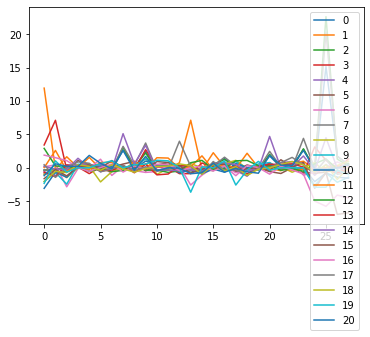

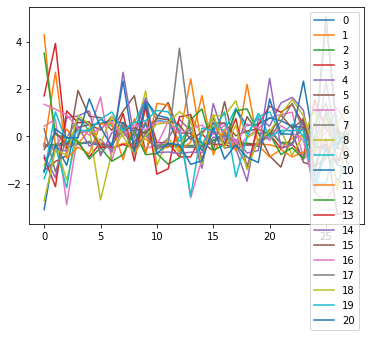

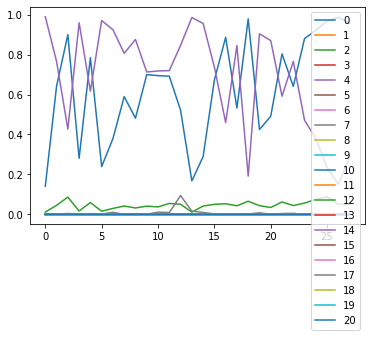

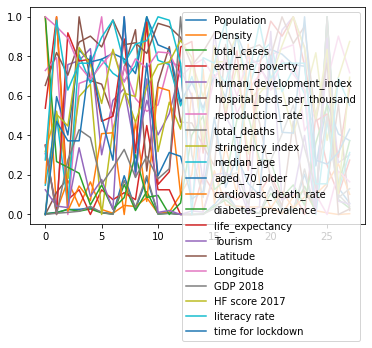

In [503]:
#countries_data_categorical=countries_data.filter(items=['Country','Dry','Wet tropical','humid subtropical','wet winters','Full lockdown','Partial lockdown','Africa','Asia','Europe','North America','South America', 'Oceania'])
countries_data_categorical=countries_data.filter(items=['Country','Dry','Wet tropical','humid subtropical','wet winters','Full lockdown','Partial lockdown','Asia','Europe','North America','South_America'])

#countries_data_numerical=countries_data.drop(['mortality_rate','Country','Dry','Wet tropical','humid subtropical','wet winters','Full lockdown','Partial lockdown','Africa','Asia','Europe','North America','South America','Oceania'],axis='columns',inplace=False)
countries_data_numerical=countries_data.drop(['mortality_rate','Country','Dry','Wet tropical','humid subtropical','wet winters','Full lockdown','Partial lockdown','Asia','Europe','North America','South_America'],axis='columns',inplace=False)

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

scaled=RobustScaler().fit_transform(countries_data_numerical)
scaled2=StandardScaler().fit_transform(countries_data_numerical)
scaled3=Normalizer().fit_transform(countries_data_numerical)
scaled4=MinMaxScaler().fit_transform(countries_data_numerical)

scaled1_df=pd.DataFrame(data=scaled)
scaled2_df=pd.DataFrame(data=scaled2)
scaled3_df=pd.DataFrame(data=scaled3)
scaled4_df=pd.DataFrame(data=scaled4,columns=["Population",
                                              "Density",
                                              "total_cases",
                                              "extreme_poverty",
                                              "human_development_index",
                                              "hospital_beds_per_thousand",
                                              "reproduction_rate",
                                              "total_deaths",
                                              "stringency_index",
                                              "median_age",
                                              "aged_70_older",
                                              "cardiovasc_death_rate",
                                              "diabetes_prevalence",
                                              "life_expectancy",
                                              "Tourism",
                                              "Latitude",
                                              "Longitude",
                                              "GDP 2018",
                                              "HF score 2017",
                                              "literacy rate",
                                              "time for lockdown"])

 
scaled1_df.plot() #RobustScaler
scaled2_df.plot() #StandardScaler
scaled3_df.plot() #Normalizer
scaled4_df.plot() #min max scaling

plt.show()

 Join the two dataframes by index to get the new scaled dataset.
 
 Add the target column as we dropped it before scaling.

In [504]:
mortality_rate = countries_data['mortality_rate']

countries_data=scaled4_df.join(countries_data_categorical)

In [505]:
countries_data.insert(31,value=mortality_rate,column='mortality_rate')

#countries_data.drop('Country',axis='columns', inplace=True)

countries_data

,Population,Density,total_cases,extreme_poverty,human_development_index,hospital_beds_per_thousand,reproduction_rate,total_deaths,stringency_index,median_age,...,Wet tropical,humid subtropical,wet winters,Full lockdown,Partial lockdown,Asia,Europe,North America,mortality_rate,South_America
0,0.003836,1.000000,0.003753,0.5375,0.308725,0.000000,0.728261,0.000231,0.318115,0.148352,...,0,0,0,1.0,0.0,1.0,0.0,0.0,0.003610,0.0
1,0.010716,0.018002,0.008300,1.0000,0.040268,0.111732,0.793478,0.006142,0.522582,0.494505,...,0,1,0,0.0,1.0,1.0,0.0,0.0,0.013424,0.0
2,0.024892,0.172367,0.026505,0.0750,0.758389,0.184358,0.000000,0.010564,0.181885,0.049451,...,0,1,0,1.0,0.0,1.0,0.0,0.0,0.007447,0.0
3,0.025910,0.041404,0.016850,0.1250,0.778523,1.000000,0.663043,0.016162,0.596234,0.807692,...,0,1,0,1.0,0.0,0.0,1.0,0.0,0.017191,0.0
4,0.033716,0.164716,0.027851,0.0000,0.838926,0.677840,0.684783,0.040979,0.659057,0.664835,...,0,1,0,1.0,0.0,0.0,1.0,0.0,0.026257,0.0
5,0.011058,0.025203,0.007873,0.1250,0.302013,0.659218,1.000000,0.010044,0.000000,0.785714,...,0,1,0,0.0,1.0,0.0,1.0,0.0,0.022095,0.0
6,0.002674,0.006301,0.002484,0.0750,0.577181,0.500931,0.413043,0.000893,0.431762,0.714286,...,0,1,0,1.0,0.0,0.0,1.0,0.0,0.008435,0.0
7,0.196003,0.045905,0.151347,0.1100,0.637584,0.741155,0.750000,0.172272,0.613648,0.675824,...,0,0,1,1.0,0.0,0.0,1.0,0.0,0.020608,0.0
8,0.027846,0.040504,0.020202,0.0750,0.322148,0.934823,0.586957,0.035960,0.596234,0.752747,...,0,1,0,1.0,0.0,0.0,1.0,0.0,0.031446,0.0
9,0.181337,0.085059,0.116026,0.4500,0.577181,0.219739,0.521739,0.196343,1.000000,1.000000,...,0,1,0,1.0,0.0,0.0,1.0,0.0,0.030565,0.0


Notice that we don't need the country name anymore, it was used just as an index when joining dataframes.

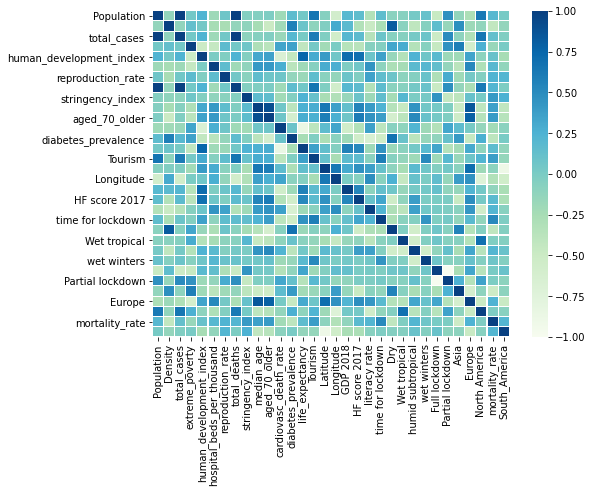

In [506]:
corr_matrix = countries_data.corr()
fig, ax = plt.subplots(figsize=(8,6))         # Sample figsize in inches 
heat_map = sns.heatmap(corr_matrix, linewidths=0.01,ax=ax, cmap='GnBu')

In [507]:
corr_matrix["mortality_rate"].sort_values(ascending=False)

mortality_rate                1.000000
time for lockdown             0.521332
stringency_index              0.407612
aged_70_older                 0.404424
Tourism                       0.383587
median_age                    0.367227
Europe                        0.243851
reproduction_rate             0.235265
South_America                 0.224678
humid subtropical             0.222886
total_deaths                  0.214290
literacy rate                 0.213887
hospital_beds_per_thousand    0.198040
Population                    0.195492
HF score 2017                 0.179583
life_expectancy               0.163713
total_cases                   0.128338
human_development_index       0.103788
wet winters                   0.068614
Full lockdown                 0.015341
Partial lockdown             -0.015341
North America                -0.020382
Wet tropical                 -0.026962
Latitude                     -0.099651
GDP 2018                     -0.119436
extreme_poverty          

In [508]:
countries_data=countries_data.filter(items=['Country','time for lockdown','stringency_index',
                                            'aged_70_older','Tourism',
                                            'median_age', 
                                            'Europe','diabetes_prevalence', #GDP Total death reproduction rate 
                                            'Density','Dry','Asia' ,
                                            'mortality_rate'])

In [509]:
#countries_data=countries_data.filter(items=['Country','time for lockdown',
#                                            'aged_70_older',
#                                            'median_age', 
#                                            'Europe', 
#                                            'HF score 2017','Latitude','Density','Dry','diabetes_prevalence','Asia' ,
#                                            'mortality_rate'])

In [510]:
#countries_data.drop(axis=0,index=3,inplace=True)
countries_data.drop(axis=1,columns='Country',inplace=True)
countries_data.reset_index(inplace=True,drop=True)

In [513]:
countries_data

,time for lockdown,stringency_index,aged_70_older,Tourism,median_age,Europe,diabetes_prevalence,Density,Dry,Asia,mortality_rate
0,0.000000,0.318115,0.000000,0.124875,0.148352,0.0,1.000000,1.000000,1,1.0,0.003610
1,0.470588,0.522582,0.596311,0.042342,0.494505,0.0,0.267704,0.018002,0,1.0,0.013424
2,0.372549,0.181885,0.402074,0.035140,0.049451,0.0,0.238911,0.172367,0,1.0,0.007447
3,0.372549,0.596234,0.832222,0.337448,0.807692,1.0,0.208560,0.041404,0,0.0,0.017191
4,0.803922,0.659057,0.771696,0.091740,0.664835,1.0,0.048249,0.164716,0,0.0,0.026257
5,0.490196,0.000000,0.785431,0.176968,0.785714,1.0,0.149416,0.025203,0,0.0,0.022095
6,0.274510,0.431762,0.814920,0.025095,0.714286,1.0,0.027237,0.006301,0,0.0,0.008435
7,1.000000,0.613648,0.787181,1.000000,0.675824,1.0,0.085603,0.045905,0,0.0,0.020608
8,0.215686,0.596234,0.712920,0.187240,0.752747,1.0,0.301946,0.040504,0,0.0,0.031446
9,0.764706,1.000000,1.000000,0.685690,1.000000,1.0,0.086381,0.085059,0,0.0,0.030565


## Method 1: Leave One Out Cross Validation

In [514]:
target = countries_data['mortality_rate'].copy()
countries_data = countries_data.drop("mortality_rate", inplace = False, axis = 1)

target.values.reshape(-1,1)

array([[0.00360975],
       [0.0134238 ],
       [0.0074472 ],
       [0.01719054],
       [0.02625737],
       [0.02209538],
       [0.00843457],
       [0.02060843],
       [0.03144633],
       [0.03056455],
       [0.01860543],
       [0.01660719],
       [0.01213302],
       [0.01340798],
       [0.01389104],
       [0.01299942],
       [0.02289807],
       [0.02052232],
       [0.00886413],
       [0.01889503],
       [0.02299084],
       [0.01718165],
       [0.01726738],
       [0.02915049],
       [0.01723597],
       [0.0181406 ],
       [0.02394331],
       [0.0234336 ]])

In [515]:
#normalize the target#
#target_scaler = MinMaxScaler()
#target_scaler.fit(target.values.reshape(-1,1))
#target = target_scaler.transform(target.values.reshape(-1,1))
#
#target = pd.Series(target.reshape(1,-1)[0])

In [516]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


loo = LeaveOneOut()
results = np.array([])

average_MAE = np.float64(0)

for train_index, test_index in loo.split(countries_data):
    train_set = countries_data.loc[train_index]
    test_set = countries_data.loc[test_index]
    train_target = target[train_index]
    test_target = target[test_index]
    
    
    model = Ridge(alpha=0.4,tol=0.9)
            
            #LinearRegression(positive = True)
            #
            #linear_model.Lasso(alpha= 0.001,tol= 0.001)
            #linear_model.SGDRegressor(eta0=0.1,alpha= 0.8, epsilon=0.02, tol= 0.001)
            #ElasticNet(l1_ratio=1,tol=0.0001)
            #SVR(kernel='rbf',C=10, epsilon=0.08, tol=0.5)
            #SVR(kernel='poly',C=100, epsilon= 0.0088, tol =0.0055, degree=5)
            #SVR(kernel='linear', C=100, epsilon= 0.000085, tol= 0.55) 
            #KNeighborsRegressor(n_neighbors=15, leaf_size=500)
            # MLPRegressor(n_iter_no_change=100, validation_fraction=0.05, hidden_layer_sizes=250, alpha=0.001, learning_rate_init=0.001, max_iter=5000, random_state=42, early_stopping=False)
           
    #      
        
    model.fit(train_set , train_target)#
    
    predictions = model.predict(test_set)#
    training_predictions = model.predict(train_set)
    
    Accuracy_MAE = 100-100*(mean_absolute_error(test_target, predictions)/test_target)
    
    if Accuracy_MAE.item()<10:
        Accuracy_MAE[test_index[0]]= np.median(training_predictions)
    
    if Accuracy_MAE.item()<0:
        Accuracy_MAE[test_index[0]]= 0
        
    results = np.append(results,[Accuracy_MAE])
    #average_MAE = average_MAE + Accuracy_MAE[test_index[0]]
    
    #print("set", test_index)
    #print("MAE:", Accuracy_MAE)
    #print(test_target, predictions, '\n')

#print("Average MAE: ", average_MAE/19)
print("Average MAE:", results.mean(),"\nMedian:", np.median(results))

Average MAE: 73.32873003177077 
Median: 82.7234760312771


## K=2

In [140]:
#target = countries_data['mortality_rate'].copy()
#countries_data = countries_data.drop("mortality_rate", inplace = False, axis = 1)

In [376]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold

kf = KFold(n_splits=52)

average_MAE = np.float64(0)

for train_index, test_index in kf.split(countries_data):
    train_set = countries_data.loc[train_index]
    test_set = countries_data.loc[test_index]
    train_target = target[train_index]
    test_target = target[test_index]
    
    #print("\n", test_index)
    #print(train_set)
    model = LinearRegression()
            #
            #Ridge(alpha=0.01,tol=0.001)
            #linear_model.Lasso(alpha= 0.5, max_iter= 20000, selection='random',tol= 0.0001)
            #linear_model.SGDRegressor(eta0=0.01,alpha= 0.1, epsilon=0.2, max_iter= 1000, tol= 0.001)
            #ElasticNet(l1_ratio=1,tol=0.00001,max_iter=1000)
            #SVR(kernel='rbf',C=100, epsilon= 0.3, tol= 0.0001)
            #SVR(kernel='linear',C=100, epsilon= 0.3, tol= 0.0001)
            #SVR(kernel='poly',C=100, epsilon= 0.3, tol= 0.0001)
            
    model.fit(train_set , train_target)
    predictions = model.predict(test_set)
    
    Accuracy_MAE = 100-100*(mean_absolute_error(test_target, predictions)/test_target)
    
    average_MAE = average_MAE + Accuracy_MAE[test_index[0]]
    
    print("set", test_index)
    #print("MAE:", Accuracy_MAE)
    print("Target:\n",test_target,"\nPredictions:", predictions, '\n')

print("Average MAE: ", average_MAE/52)

set [0 1]
Target:
 0    0.043719
1    0.018593
Name: mortality_rate, dtype: float64 
Predictions: [0.05925403 0.0324571 ] 

set [2 3]
Target:
 2    0.013708
3    0.003574
Name: mortality_rate, dtype: float64 
Predictions: [0.01959144 0.02598269] 

set [4 5]
Target:
 4    0.015313
5    0.001155
Name: mortality_rate, dtype: float64 
Predictions: [0.0208517  0.01354953] 

set [6 7]
Target:
 6    0.016304
7    0.047991
Name: mortality_rate, dtype: float64 
Predictions: [-0.00776712 -0.01963141] 

set [8 9]
Target:
 8    0.012656
9    0.014261
Name: mortality_rate, dtype: float64 
Predictions: [0.01616681 0.08176493] 

set [10 11]
Target:
 10    0.027262
11    0.038681
Name: mortality_rate, dtype: float64 
Predictions: [0.02580113 0.00532551] 

set [12 13]
Target:
 12    0.020390
13    0.007413
Name: mortality_rate, dtype: float64 
Predictions: [ 0.0293286  -0.00633617] 

set [14 15]
Target:
 14    0.016873
15    0.012796
Name: mortality_rate, dtype: float64 
Predictions: [0.01425528 0.0468

## Method 2: Splitting The Dataset to Training and Testing
* Apply *stratified* sampling method to split the data. The categories were based on the population attribute to make sure that the test set has a variety of instances thus eliminating any possible bias.

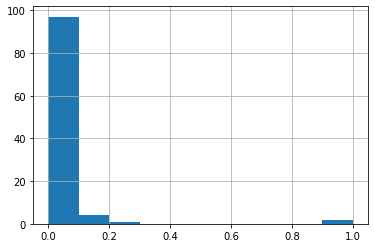

In [403]:
countries_data["Population"].hist()
plt.show()

<AxesSubplot:>

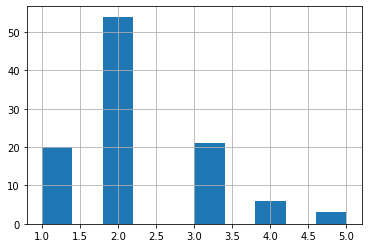

In [404]:
countries_data['Population_cat']=countries_data["Population"]
countries_data["Population_cat"].where(countries_data["Population"] < 0.2, 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.6), 5, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.2) | (countries_data["Population"] >= 0.3), 5, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.08) | (countries_data["Population"] >= 0.2), 4, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.015) | (countries_data["Population"] >= 0.08), 3, inplace=True)
countries_data["Population_cat"].where((countries_data["Population"] < 0.001) | (countries_data["Population"] >= 0.015), 2, inplace=True)
#countries_data["Population_cat"].where((countries_data["Population"] < 0.0008) | (countries_data["Population"] >= 0.001), 2, inplace=True)
countries_data["Population_cat"].where(countries_data["Population"] > 0.001, 1, inplace=True)
countries_data['Population_cat'].hist()

* After applying the stratified shuffle split, drop the category feature that was created based on the population.

In [405]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(countries_data, countries_data["Population_cat"]):
    train_set = countries_data.loc[train_index]
    test_set = countries_data.loc[test_index]

for set in (train_set, test_set):
    set.drop(["Population_cat"], axis=1, inplace=True)
    
countries_data.drop('Population_cat',axis='columns', inplace=True)

* The figure below shows how the test and training sets are constructed from the countries_data dataset. It can be clearly seen how the stratified shuffle split allowed the test set to be similar to the original dataset and not biased.

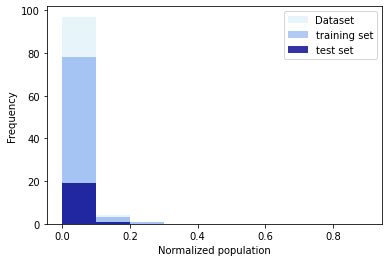

In [406]:
plt.hist(countries_data['Population'], alpha=0.2, color='skyblue',bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.hist(train_set['Population'], alpha=0.5,color='cornflowerblue',bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.hist(test_set['Population'], alpha=0.8,bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],color='darkblue')

plt.legend(["Dataset","training set","test set"])
plt.xlabel("Normalized population")
plt.ylabel("Frequency")
plt.show()

* Copy the training set to analyze it without any worries about ruining it.

In [407]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 22 to 5
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  83 non-null     float64
 1   Density                     83 non-null     float64
 2   total_cases                 83 non-null     float64
 3   extreme_poverty             83 non-null     float64
 4   human_development_index     83 non-null     float64
 5   hospital_beds_per_thousand  83 non-null     float64
 6   reproduction_rate           83 non-null     float64
 7   total_deaths                83 non-null     float64
 8   stringency_index            83 non-null     float64
 9   Tourism                     83 non-null     float64
 10  Latitude                    83 non-null     float64
 11  Longitude                   83 non-null     float64
 12  GDP 2018                    83 non-null     float64
 13  HF score 2017               83 non-nu

In [408]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 20 to 25
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  21 non-null     float64
 1   Density                     21 non-null     float64
 2   total_cases                 21 non-null     float64
 3   extreme_poverty             21 non-null     float64
 4   human_development_index     21 non-null     float64
 5   hospital_beds_per_thousand  21 non-null     float64
 6   reproduction_rate           21 non-null     float64
 7   total_deaths                21 non-null     float64
 8   stringency_index            21 non-null     float64
 9   Tourism                     21 non-null     float64
 10  Latitude                    21 non-null     float64
 11  Longitude                   21 non-null     float64
 12  GDP 2018                    21 non-null     float64
 13  HF score 2017               21 non-n

In [409]:
countriesData = train_set.copy()
test_target = test_set["mortality_rate"].copy()
test_set = test_set.drop(['mortality_rate'], axis='columns', inplace=False)

training_target = train_set['mortality_rate'].copy()

In [410]:
#target_scaler = MinMaxScaler()
#target_scaler.fit(training_target)
#training_target = target_scaler.transform(training_target)
#test_target = target_scaler.transform(test_target)

In [411]:
training_target

22     0.000828
80     0.020427
72     0.019580
26     0.021864
92     0.030160
         ...   
103    0.017573
84     0.020316
40     0.287646
42     0.010154
5      0.001155
Name: mortality_rate, Length: 83, dtype: float64

In [412]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 22 to 5
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  83 non-null     float64
 1   Density                     83 non-null     float64
 2   total_cases                 83 non-null     float64
 3   extreme_poverty             83 non-null     float64
 4   human_development_index     83 non-null     float64
 5   hospital_beds_per_thousand  83 non-null     float64
 6   reproduction_rate           83 non-null     float64
 7   total_deaths                83 non-null     float64
 8   stringency_index            83 non-null     float64
 9   Tourism                     83 non-null     float64
 10  Latitude                    83 non-null     float64
 11  Longitude                   83 non-null     float64
 12  GDP 2018                    83 non-null     float64
 13  HF score 2017               83 non-nu

### Analyzing Correlations

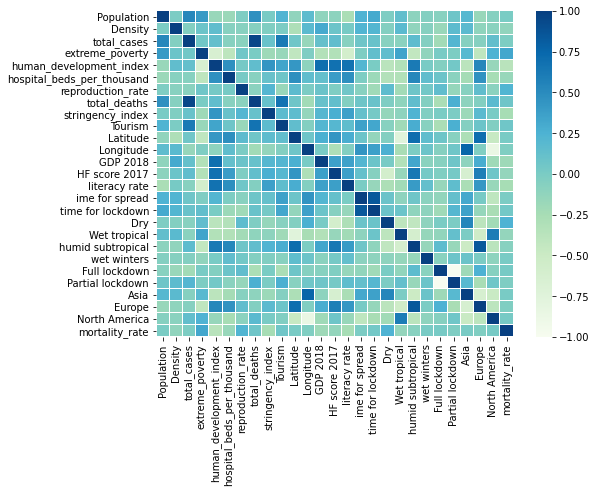

In [413]:
countriesData = countriesData.reset_index()
countriesData.drop('index',axis='columns', inplace=True)

corr_matrix = countriesData.corr()
fig, ax = plt.subplots(figsize=(8,6))         # Sample figsize in inches 
heat_map = sns.heatmap(corr_matrix, linewidths=0.01,ax=ax, cmap='GnBu')

In [414]:
corr_matrix["mortality_rate"].sort_values(ascending=False)

mortality_rate                1.000000
extreme_poverty               0.322058
Dry                           0.244760
reproduction_rate             0.227353
total_deaths                  0.065578
Tourism                       0.061534
time for lockdown             0.039366
Full lockdown                 0.018598
North America                 0.015794
Asia                          0.013216
Latitude                      0.010375
wet winters                   0.010060
Population                    0.007379
ime for spread               -0.005787
total_cases                  -0.008964
Partial lockdown             -0.018598
Europe                       -0.027888
Longitude                    -0.030315
humid subtropical            -0.073554
Density                      -0.121172
HF score 2017                -0.134617
Wet tropical                 -0.139349
hospital_beds_per_thousand   -0.159702
GDP 2018                     -0.189629
literacy rate                -0.246765
stringency_index         

### Taking a look at the data before fitting it in a ML model

In [415]:
countriesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  83 non-null     float64
 1   Density                     83 non-null     float64
 2   total_cases                 83 non-null     float64
 3   extreme_poverty             83 non-null     float64
 4   human_development_index     83 non-null     float64
 5   hospital_beds_per_thousand  83 non-null     float64
 6   reproduction_rate           83 non-null     float64
 7   total_deaths                83 non-null     float64
 8   stringency_index            83 non-null     float64
 9   Tourism                     83 non-null     float64
 10  Latitude                    83 non-null     float64
 11  Longitude                   83 non-null     float64
 12  GDP 2018                    83 non-null     float64
 13  HF score 2017               83 non-nu

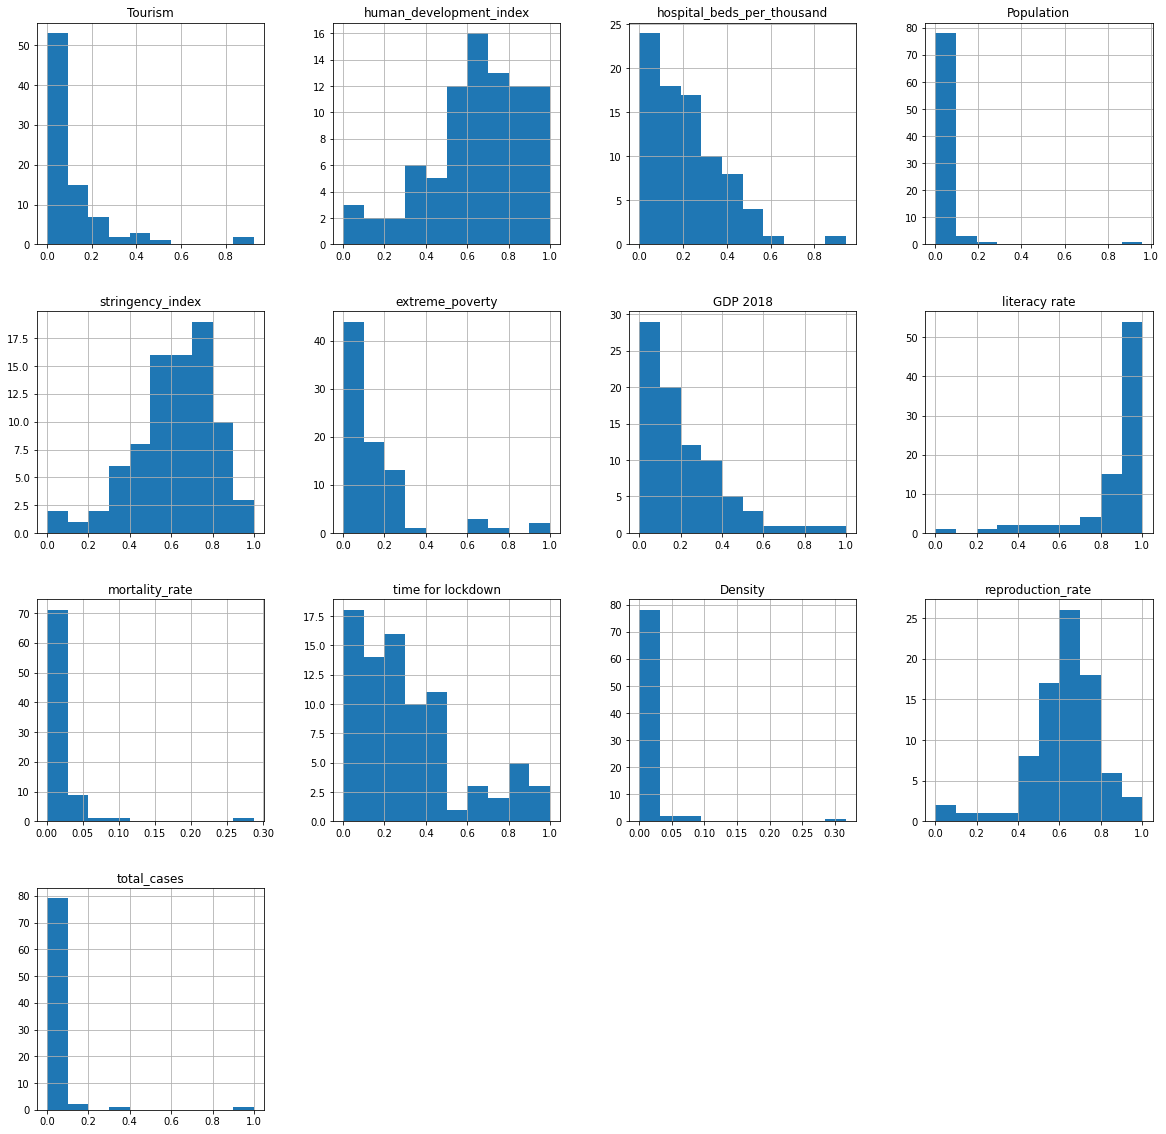

In [416]:
%matplotlib inline 
countriesData[{"GDP 2018","Tourism","hospital_beds_per_thousand","time for lockdown","Population","human_development_index","Density","literacy rate","extreme_poverty","mortality_rate","total_cases","stringency_index","reproduction_rate"}].hist(bins=10, figsize=(20,20))
plt.show()

### Selecting and Training Models

*Not all models were mentioned in the paper, only the ones that gave good results in the test set.*

In [417]:
training_data=countriesData.drop('mortality_rate',axis='columns', inplace=False)

### Linear Regression

First, we used linear regression model to train our data. 

Grid search was used to find the best hyperparameter, which was n_jobs. The results was n_jobs=1, the default value.

#### Spreading Speed:

In [418]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lin_reg = LinearRegression()
lin_reg.fit(training_data, training_target)

lin_predictions = lin_reg.predict(training_data)

param_grid = [{'n_jobs': [1, 5, 10,20,100]}]

grid_search = GridSearchCV(lin_reg, param_grid, cv=5,scoring='neg_mean_absolute_error')
grid_search.fit(training_data, training_target)
print(grid_search.best_params_)

{'n_jobs': 1}


There are different metrics that can be used to quantify the quality of our predictions. 

In [419]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,lin_predictions))

from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,lin_predictions)))

from sklearn.metrics import median_absolute_error
print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,lin_predictions))

Mean Absolute Error (MAE)		: 0.012883900876169823
Root Mean Squared Error (RMSE)		: 0.023694427046442406
Median Absolute Error (MAE)		: 0.007636272694951679


In [420]:
#print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target_mortality, lin_predictions_mortality))
#print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target_mortality, lin_predictions_mortality))

Here we can compare between our predictions and some actual targets. 

In [421]:
some_data = training_data.iloc[:5]
some_labels = training_target[:5]
print("Predictions:\t", lin_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [0.02232677 0.01280952 0.00387832 0.03323064 0.03230991]
Labels:		 [0.0008278145695364, 0.0204269811032344, 0.0195804888832984, 0.0218640362929174, 0.0301604536132223]


Cross Validation

In [422]:
def display_scores(scores):
    print("Scores\t:", scores)
    print("Mean\t:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, training_data, training_target,scoring="neg_mean_absolute_error", cv=10)
lin_scores = -lin_scores

display_scores(lin_scores)

Scores	: [0.02924844 0.01353513 0.01602693 0.02129626 0.02975286 0.01635342
 0.02483955 0.01506755 0.02391913 0.05130542]
Mean	: 0.024134468131656837
Standard deviation: 0.01060853816675218


### Ridge Regression

In [423]:
from sklearn.linear_model import Ridge

Ridge_reg = Ridge(alpha=0.5,tol=0.001)
Ridge_reg.fit(training_data,training_target) #.ravel()
Ridge_predictions = Ridge_reg.predict(training_data)

In [424]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,Ridge_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,Ridge_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,Ridge_predictions))

Mean Absolute Error (MAE)		: 0.013084732107427366
Root Mean Squared Error (RMSE)		: 0.025286049839210706
Median Absolute Error (MAE)		: 0.0075816328789659986


In [425]:
#param_grid_Ridge = [{'alpha':[0.5,1,2,3,4],
#                     'tol':[0.001,0.0001,0.00001]}]
#
#grid_search_Ridge = GridSearchCV(Ridge_reg, param_grid_Ridge, cv=10,scoring='neg_mean_absolute_error')
#grid_search_Ridge.fit(training_data, training_target)
#print(grid_search_Ridge.best_params_)

In [426]:
#Ridge_scores = cross_val_score(Ridge_reg, training_data, training_target,scoring="neg_root_mean_squared_error", cv=10)
#Ridge_scores = -Ridge_scores
#display_scores(Ridge_scores)

### Lasso Regression

In [427]:
from sklearn import linear_model

Lasso_reg = linear_model.Lasso(alpha= 0.5, max_iter= 20000, selection='random',tol= 0.0001)
Lasso_reg.fit(training_data,training_target.ravel())

Lasso_predictions = Lasso_reg.predict(training_data)

In [428]:
#param_grid_Lasso = [{'alpha': [0.1,0.7,0.5,0.2],
#                     'max_iter': [1000,15000,20000,2500,10000],
#                     'tol': [0.002,0.005,0.001,0.0065],
#                     'selection': ['random']}]
#
#grid_search_Lasso = GridSearchCV(Lasso_reg, param_grid_Lasso, cv=10,scoring='neg_mean_absolute_error')
#grid_search_Lasso.fit(training_data, training_target)
#print(grid_search_Lasso.best_params_)

In [429]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,Lasso_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,Lasso_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,Lasso_predictions))

Mean Absolute Error (MAE)		: 0.012980129901744257
Root Mean Squared Error (RMSE)		: 0.03223988440050674
Median Absolute Error (MAE)		: 0.00848987147510738


In [430]:
print("Predictions:\t", Lasso_reg.predict(some_data))
#print("Labels:\t\t", list(some_labels))

Predictions:	 [0.02167058 0.02167058 0.02167058 0.02167058 0.02167058]


In [431]:
#Lasso_scores = cross_val_score(Lasso_reg, training_data, training_target,scoring="neg_root_mean_squared_error", cv=10)
#Lasso_scores = -Lasso_scores
#display_scores(Lasso_scores)

### SGD

SGD was not included in the paper as we focused more on the comparison between different SVM kernels and different Regularized Linear Regression models 

In [432]:
from sklearn.linear_model import SGDRegressor

SGD_reg=linear_model.SGDRegressor(eta0=0.01,alpha= 0.0001, epsilon=0.2, max_iter= 10000000, tol= 0.001)
SGD_reg.fit(training_data, training_target.ravel())

SGD_predictions = SGD_reg.predict(training_data)

In [433]:
#param_grid_SGD = [{'alpha':[0.1,0.01,0.0001,0.00001],
#                   'max_iter':[1000000,10000000],
#                   'tol':[0.01,0.001,0.0001],
#                   'epsilon':[0.1,0.2,0.3,0.4,0.5],
#                   'eta0':[0.1,0.01,0.05]}]
#
#   
#
#grid_search_SGD = GridSearchCV(SGD_reg, param_grid_SGD, cv=5,scoring='neg_mean_absolute_error')
#grid_search_SGD.fit(training_data, training_target)
#print(grid_search_SGD.best_params_)

In [434]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SGD_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SGD_predictions)))

#print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,SGD_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SGD_predictions))

Mean Absolute Error (MAE)		: 0.012637562318989909
Root Mean Squared Error (RMSE)		: 0.03150471903095733
Median Absolute Error (MAE)		: 0.007984984059364944


In [435]:
print("Predictions:\t", SGD_reg.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [0.02576275 0.02093975 0.01713134 0.02403857 0.01718838]
Labels:		 [0.0008278145695364, 0.0204269811032344, 0.0195804888832984, 0.0218640362929174, 0.0301604536132223]


In [436]:
#SGD_scores = cross_val_score(SGD_reg, training_data, training_target,scoring="neg_mean_absolute_error", cv=10)
#SGD_scores = -SGD_scores
#
#display_scores(SGD_scores)

### Elastics Net

In [437]:
from sklearn.linear_model import ElasticNet

Elastic_reg = ElasticNet(l1_ratio=1,tol=0.00001,max_iter=1000)
Elastic_reg.fit(training_data, training_target.ravel())

Elastic_predictions = Elastic_reg.predict(training_data)

In [438]:
#param_grid_Elastic = [{'l1_ratio':[1,0.8,0.6,0.4],
#                       'max_iter':[1000,10000,100000],
#                       'tol':[0.001,0.00001,0.0001]}]
#   
#
#grid_search_Elastic = GridSearchCV(Elastic_reg, param_grid_Elastic, cv=5,scoring='neg_mean_absolute_error')
#grid_search_Elastic.fit(training_data, training_target)
#print(grid_search_Elastic.best_params_)

In [439]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,Elastic_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,Elastic_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,Elastic_predictions))

Mean Absolute Error (MAE)		: 0.012980129901744257
Root Mean Squared Error (RMSE)		: 0.03223988440050674
Median Absolute Error (MAE)		: 0.00848987147510738


In [440]:
#Elastic_scores = cross_val_score(Elastic_reg, training_data, training_target,scoring="neg_root_mean_squared_error", cv=10)
#Elastic_scores = -Elastic_scores
#
#display_scores(Elastic_scores)

### RBF SVM

In [441]:
from sklearn.svm import SVR

SVM_rbf_reg = SVR(kernel='rbf',C=150, epsilon= 0.3, tol= 0.0001)
SVM_rbf_reg.fit(training_data, training_target.ravel())

SVM_rbf_predictions = SVM_rbf_reg.predict(training_data)

print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SVM_rbf_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SVM_rbf_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SVM_rbf_predictions))

Mean Absolute Error (MAE)		: 0.1258544689183988
Root Mean Squared Error (RMSE)		: 0.12656963601941584
Median Absolute Error (MAE)		: 0.12719272305524326


### Linear SVM

SVR with kernel 'linear' was used instead of LinearSVR as our dataset is small

In [442]:
from sklearn.svm import SVR

SVM_reg = SVR(kernel='linear',C=150, epsilon= 0.3, tol= 0.0001)
SVM_reg.fit(training_data, training_target.ravel())

SVM_predictions = SVM_reg.predict(training_data)

In [443]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SVM_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SVM_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SVM_predictions
                                                              ))

Mean Absolute Error (MAE)		: 0.1258544689183988
Root Mean Squared Error (RMSE)		: 0.12656963601941584
Median Absolute Error (MAE)		: 0.12719272305524326


### Polynomial SVM

In [444]:
from sklearn.svm import SVR

SVM_poly_reg = SVR(kernel='poly',C=150, degree= 2, epsilon= 0.3, tol= 0.0001)
SVM_poly_reg.fit(training_data, training_target.ravel())

SVM_poly_predictions = SVM_poly_reg.predict(training_data)

In [445]:
#param_grid_SVM_poly = [{'C':[10,20,5,40,50],
#                     'degree':[2,3,4,5],
#                     'tol':[0.01,0.001,0.0001],
#                     'epsilon':[0.3,0.1,0.5]
#                      }]
#   
#
#grid_search_SVM_poly = GridSearchCV(SVM_poly_reg, param_grid_SVM_poly, cv=10,scoring='neg_mean_absolute_error')
#grid_search_SVM_poly.fit(training_data, training_target)
#print(grid_search_SVM_poly.best_params_)

In [446]:
print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,SVM_poly_predictions))

print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,SVM_poly_predictions)))

print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,SVM_poly_predictions))

Mean Absolute Error (MAE)		: 0.1258544689183988
Root Mean Squared Error (RMSE)		: 0.12656963601941584
Median Absolute Error (MAE)		: 0.12719272305524326


### Ensemble

Ensemble method was not included in the paper as it did not give any improvement regarding our predictions

In [447]:
#ensemble_test=(lin_predictions+Lasso_predictions+Ridge_predictions+SVM_predictions+SVM_poly_predictions+Elastic_predictions+SGD_predictions)/7
#
#print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,ensemble_test))
#
#print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,ensemble_test)))
#
##print("Root Mean Squared Log Error (RMSLE)\t:",np.sqrt(mean_squared_log_error(training_target,ensemble_test)))
#
#print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,ensemble_test))

In [448]:
#ensemble_median = np.stack([lin_predictions, Lasso_predictions, Ridge_predictions, SVM_predictions, SVM_poly_predictions, Elastic_predictions, SGD_predictions])
#ensemble_median=np.median(ensemble_median, axis = 0)
#
#print("Mean Absolute Error (MAE)\t\t:",mean_absolute_error(training_target,ensemble_median))
#
#print("Root Mean Squared Error (RMSE)\t\t:",np.sqrt(mean_squared_error(training_target,ensemble_median)))
#
#print("Median Absolute Error (MAE)\t\t:",median_absolute_error(training_target,ensemble_median))

In [449]:
Accuracy_train_MAE_lin_reg = 100-100*(mean_absolute_error(training_target, lin_predictions)/training_target.mean())
Accuracy_train_medAE_lin_reg = 100-100*(median_absolute_error(training_target, lin_predictions)/training_target.mean())

Accuracy_train_MAE_Lasso = 100-100*(mean_absolute_error(training_target, Lasso_predictions)/training_target.mean())
Accuracy_train_medAE_Lasso = 100-100*(median_absolute_error(training_target, Lasso_predictions)/training_target.mean())

Accuracy_train_MAE_Ridge = 100-100*(mean_absolute_error(training_target, Ridge_predictions)/training_target.mean())
Accuracy_train_medAE_Ridge = 100-100*(median_absolute_error(training_target, Ridge_predictions)/training_target.mean())

Accuracy_train_MAE_Net = 100-100*(mean_absolute_error(training_target, Elastic_predictions)/training_target.mean())
Accuracy_train_medAE_Net = 100-100*(median_absolute_error(training_target, Elastic_predictions)/training_target.mean())

Accuracy_train_MAE_Poly = 100-100*(mean_absolute_error(training_target, SVM_poly_predictions)/training_target.mean())
Accuracy_train_medAE_Poly = 100-100*(median_absolute_error(training_target, SVM_poly_predictions)/training_target.mean())

Accuracy_train_MAE_SVM_lin = 100-100*(mean_absolute_error(training_target, SVM_predictions)/training_target.mean())
Accuracy_train_medAE_SVM_lin = 100-100*(median_absolute_error(training_target, SVM_predictions)/training_target.mean())

Accuracy_train_MAE_RBF = 100-100*(mean_absolute_error(training_target, SVM_rbf_predictions)/training_target.mean())
Accuracy_train_medAE_RBF = 100-100*(median_absolute_error(training_target, SVM_rbf_predictions)/training_target.mean())

In [450]:
print("Lin reg MAE:", Accuracy_train_MAE_lin_reg)
print("Lin reg MedAE:",Accuracy_train_medAE_lin_reg,"\n")
print("Lasso MAE:",Accuracy_train_MAE_Lasso)
print("Lasso MedAE:",Accuracy_train_medAE_Lasso,"\n" )
print("Ridge MAE:",Accuracy_train_MAE_Ridge )
print("Ridge MedAE:",Accuracy_train_medAE_Ridge,"\n" )
print("Elastic MAE:",Accuracy_train_MAE_Net )
print("Elastic MedAE:",Accuracy_train_medAE_Net,"\n" )
print("SVM Poly MAE:",Accuracy_train_MAE_Poly )
print("SVM Poly MedAE:",Accuracy_train_medAE_Poly,"\n" )
print("SVM Lin MAE:",Accuracy_train_MAE_SVM_lin) 
print("SVM Lin MedAE:",Accuracy_train_medAE_SVM_lin,"\n") 
print("SVM RBF MAE:",Accuracy_train_MAE_RBF )
print("SVM RBF MedAE:",Accuracy_train_medAE_RBF )

Lin reg MAE: 40.54658617818485
Lin reg MedAE: 64.76203248125599 

Lasso MAE: 40.10253246074833
Lasso MedAE: 60.823057631778525 

Ridge MAE: 39.61984027917038
Ridge MedAE: 65.01417068242401 

Elastic MAE: 40.10253246074833
Elastic MedAE: 60.823057631778525 

SVM Poly MAE: -480.76182779161195
SVM Poly MedAE: -486.9372693571188 

SVM Lin MAE: -480.76182779161195
SVM Lin MedAE: -486.9372693571188 

SVM RBF MAE: -480.76182779161195
SVM RBF MedAE: -486.9372693571188


## Testing

After training our models let's finally test it on data that it has never seen before.


Mean Absolute Error was chosen as the preformance measure. Mean root square error was not recommended as it's sensitive to outliers, which occur in our case.  

The procedure is simple. Just use the predictors with the test set.

In [451]:
#test_target = test_set["time for spread"].copy()
#test_set=test_set.drop("time for spread", axis='columns',inplace=False)

#test_target=test_target.reset_index()
#test_target.drop('index',inplace=True,axis='columns')

Predict the test set by every model that we trained

In [452]:
final_predictions = SVM_poly_reg.predict(test_set)#SVM poly
final_predictions2 = SVM_reg.predict(test_set)#SVM linear
final_predictions11 = SVM_rbf_reg.predict(test_set)#SVM rbf

final_predictions3 = lin_reg.predict(test_set)#linear regression
final_predictions4 = Lasso_reg.predict(test_set)#lasso
final_predictions5 = Ridge_reg.predict(test_set)#ridge
final_predictions6 = Elastic_reg.predict(test_set)#elastic net

final_predictions7 = SGD_reg.predict(test_set)#SGD

Convert to pandas dataframe to apply error functions

In [453]:
final_predictions=pd.DataFrame(data=final_predictions,columns=['time for spread'])#SVM poly       
final_predictions2=pd.DataFrame(data=final_predictions2,columns=['time for spread'])#SVM          
final_predictions11=pd.DataFrame(data=final_predictions11,columns=['time for spread'])#SVM rbf        

final_predictions3=pd.DataFrame(data=final_predictions3,columns=['time for spread'])#linear           
final_predictions4=pd.DataFrame(data=final_predictions4,columns=['time for spread'])#Lasso         
final_predictions5=pd.DataFrame(data=final_predictions5,columns=['time for spread'])#Ridge           
final_predictions6=pd.DataFrame(data=final_predictions6,columns=['time for spread'])#Elastic net        

final_predictions7=pd.DataFrame(data=final_predictions7,columns=['time for spread'])#SGD           

Find the Mean Absolute Error and the Median Absolute Error of each model.

## MAE

In [454]:
MAE_SVM_poly=mean_absolute_error(test_target,final_predictions)
MAE_SVM_lin=mean_absolute_error(test_target,final_predictions2)
MAE_SVM_RBF=mean_absolute_error(test_target,final_predictions11)

MAE_Lin_reg=mean_absolute_error(test_target,final_predictions3)
MAE_Lasso=mean_absolute_error(test_target,final_predictions4)
MAE_Ridge=mean_absolute_error(test_target,final_predictions5)
MAE_Elastic=mean_absolute_error(test_target,final_predictions6)

MAE_SGD=mean_absolute_error(test_target,final_predictions7)

In [455]:
print("Mean Absolute Error SVM polynomial\t\t:",mean_absolute_error(test_target,final_predictions))
print("Mean Absolute Error SVM\t\t\t\t:",mean_absolute_error(test_target,final_predictions2))
print("Mean Absolute Error SVR rbf\t\t\t:",mean_absolute_error(test_target,final_predictions11))

print("\nMean Absolute Error Linear regression\t\t:",mean_absolute_error(test_target,final_predictions3))
print("Mean Absolute Error Lasso regression\t\t:",mean_absolute_error(test_target,final_predictions4))
print("Mean Absolute Error Ridge regression\t\t:",mean_absolute_error(test_target,final_predictions5))
print("Mean Absolute Error Elastic net\t\t\t:",mean_absolute_error(test_target,final_predictions6))

print("\nMean Absolute Error SGD\t\t\t\t:",mean_absolute_error(test_target,final_predictions7))

Mean Absolute Error SVM polynomial		: 0.12501544576697365
Mean Absolute Error SVM				: 0.12501544576697365
Mean Absolute Error SVR rbf			: 0.12501544576697365

Mean Absolute Error Linear regression		: 0.017846753211986824
Mean Absolute Error Lasso regression		: 0.009010554983137697
Mean Absolute Error Ridge regression		: 0.01155732002383795
Mean Absolute Error Elastic net			: 0.009010554983137697

Mean Absolute Error SGD				: 0.008450087095812282


In [456]:
test_target.mean()

0.019049836484869118

Calculate the accuracy of our predictions. 

$Percentage Error =100* \frac{MAE}{Mean \ Target \ Values}$

$Accuracy = 100 \ – Percentage Error $

In [457]:
Accuracy_SVM_Poly = 100-100*(MAE_SVM_poly/test_target.mean())
Accuracy_SVM_lin = 100-100*(MAE_SVM_lin/test_target.mean())
Accuracy_SVM_RBF = 100-100*(MAE_SVM_RBF/test_target.mean())

Accuracy_Lin_reg = 100-100*(MAE_Lin_reg/test_target.mean())
Accuracy_Lasso   = 100-100*(MAE_Lasso/test_target.mean())
Accuracy_Ridge   = 100-100*(MAE_Ridge/test_target.mean())
Accuracy_Elastic_Net = 100-100*(MAE_Elastic/test_target.mean())

Accuracy_SGD     = 100-100*(MAE_SGD/test_target.mean())

In [458]:
print("Accuracy SVM Poly\t:",Accuracy_SVM_Poly)
print("Accuracy SVM lin\t:",Accuracy_SVM_lin )
print("Accuracy SVM RBF\t:",Accuracy_SVM_RBF )

print("\nAccuracy Lin reg\t:",Accuracy_Lin_reg )
print("Accuracy Lasso\t\t:",Accuracy_Lasso   )
print("Accuracy Ridge\t\t:",Accuracy_Ridge   )
print("Accuracy Elastic Net\t:",Accuracy_Elastic_Net)

print("\nAccuracy SGD\t\t:",Accuracy_SGD)

Accuracy SVM Poly	: -556.2546920876239
Accuracy SVM lin	: -556.2546920876239
Accuracy SVM RBF	: -556.2546920876239

Accuracy Lin reg	: 6.315451966413875
Accuracy Lasso		: 52.700092778777446
Accuracy Ridge		: 39.33113266868361
Accuracy Elastic Net	: 52.700092778777446

Accuracy SGD		: 55.64220667970559


Text(0, 0.5, 'Accuracy')

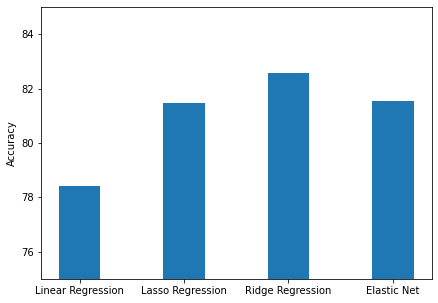

In [459]:
names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net']
#values = [Accuracy_Lasso, Accuracy_Ridge, Accuracy_Elastic_Net] error so inserted the values manually
#values = [83.207609, 83.700748, 82.784986]  old

values = [78.411748, 81.463779, 82.560484, 81.531555]

fig, ax = plt.subplots(figsize=(7,5))

plt.bar(names, values, width= 0.4)

ax.yaxis.set_minor_formatter(plt.ScalarFormatter())
plt.ylim(bottom=75, top=85)

plt.ylabel("Accuracy")
#plt.xlabel("Model")

Text(0, 0.5, 'Accuracy')

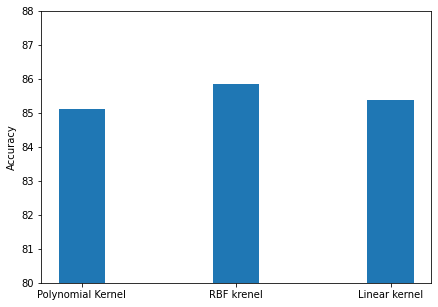

In [460]:
names_SVM = ['Polynomial Kernel', 'RBF krenel', 'Linear kernel']
#values_SVM = [Accuracy_SVM_Poly, Accuracy_SVM_RBF, Accuracy_SVM_lin]
#values_SVM = [86.202998, 85.85229, 84.80567] old
values_SVM = [85.116036, 85.847255, 85.391127]


figSVM, axSVM = plt.subplots(figsize=(7,5))

plt.bar(names_SVM, values_SVM, width= 0.3)

axSVM.yaxis.set_minor_formatter(plt.ScalarFormatter())

plt.ylim(bottom=80, top=88)
plt.ylabel("Accuracy")

## Median

In [461]:
Med_SVM_poly=median_absolute_error(test_target,final_predictions)    
Med_SVM_lin =median_absolute_error(test_target,final_predictions2)       
Med_SVM_RBF =median_absolute_error(test_target,final_predictions11) 

Med_Lin_reg =median_absolute_error(test_target,final_predictions3)
Med_Lasso   =median_absolute_error(test_target,final_predictions4)
Med_Ridge   =median_absolute_error(test_target,final_predictions5)
Med_Elastic =median_absolute_error(test_target,final_predictions6) 

Med_SGD     =median_absolute_error(test_target,final_predictions7)          

In [462]:
print("Median Absolute Error SVM polynomial\t\t:",Med_SVM_poly)    
print("Median Absolute Error SVM\t\t\t:",Med_SVM_lin)   
print("Median Absolute Error SVR rbf\t\t\t:",Med_SVM_RBF)   

print("\nMedian Absolute Error Linear regression\t\t:",Med_Lin_reg) 
print("Median Absolute Error Lasso regression\t\t:",Med_Lasso) 
print("Median Absolute Error Ridge regression\t\t:",Med_Ridge)  
print("Median Absolute Error Elastic net\t\t:",Med_Elastic)   

print("\nMedian Absolute Error SGD\t\t\t:",Med_SGD)               

Median Absolute Error SVM polynomial		: 0.12606845967775965
Median Absolute Error SVM			: 0.12606845967775965
Median Absolute Error SVR rbf			: 0.12606845967775965

Median Absolute Error Linear regression		: 0.009268948032061112
Median Absolute Error Lasso regression		: 0.00796239469383272
Median Absolute Error Ridge regression		: 0.01016461141164628
Median Absolute Error Elastic net		: 0.00796239469383272

Median Absolute Error SGD			: 0.007524092191314164


In [463]:
Accuracy_SVM_Poly_median = 100-100*(Med_SVM_poly/test_target.mean())
Accuracy_SVM_lin_median= 100-100*(Med_SVM_lin/test_target.mean())
Accuracy_SVM_RBF_median= 100-100*(Med_SVM_RBF/test_target.mean())

Accuracy_Lin_reg_median= 100-100*(Med_Lin_reg/test_target.mean())
Accuracy_Lasso_median= 100-100*(Med_Lasso/test_target.mean())
Accuracy_Ridge_median= 100-100*(Med_Ridge/test_target.mean())
Accuracy_Elastic_Net_median = 100-100*(Med_Elastic/test_target.mean())

Accuracy_SGD_median     = 100-100*(Med_SGD/test_target.mean())

print("Accuracy SVM Poly\t:",Accuracy_SVM_Poly_median)
print("Accuracy SVM lin\t:",Accuracy_SVM_lin_median )
print("Accuracy SVM RBF\t:",Accuracy_SVM_RBF_median )

print("\nAccuracy Lin reg\t:",Accuracy_Lin_reg_median )
print("Accuracy Lasso\t\t:",Accuracy_Lasso_median   )
print("Accuracy Ridge\t\t:",Accuracy_Ridge_median   )
print("Accuracy Elastic Net\t:",Accuracy_Elastic_Net_median)

print("\nAccuracy SGD\t\t:",Accuracy_SGD_median)

Accuracy SVM Poly	: -561.7823716119199
Accuracy SVM lin	: -561.7823716119199
Accuracy SVM RBF	: -561.7823716119199

Accuracy Lin reg	: 51.34368717850549
Accuracy Lasso		: 58.2022937563948
Accuracy Ridge		: 46.64200178453072
Accuracy Elastic Net	: 58.2022937563948

Accuracy SGD		: 60.503114043575174


Text(0, 0.5, 'Accuracy')

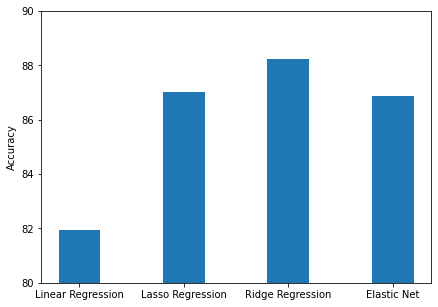

In [464]:
names_med = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net']
#values = [Accuracy_Lasso, Accuracy_Ridge, Accuracy_Elastic_Net] error so inserted the values manually
#values_med = [85.561701, 83.755405, 85.745758] old
values_med = [81.953551, 87.028402, 88.233752, 86.860861]

#plt.figure()
fig_med, ax_med = plt.subplots(figsize=(7,5))

plt.bar(names_med, values_med, width= 0.4)

ax_med.yaxis.set_minor_formatter(plt.ScalarFormatter())
plt.ylim(bottom=80, top=90)
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

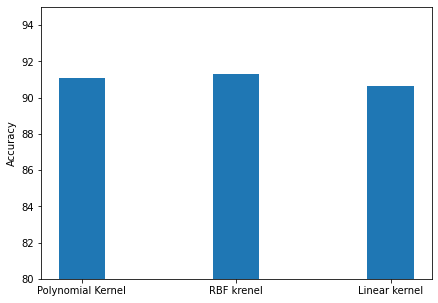

In [465]:
names_SVM_med = ['Polynomial Kernel', 'RBF krenel', 'Linear kernel']
#values_SVM = [Accuracy_SVM_Poly, Accuracy_SVM_RBF, Accuracy_SVM_lin]
#values_SVM_med = [88.746421, 89.111174, 88.57851]
values_SVM_med = [91.087562, 91.314265, 90.637946]

#plt.figure()
figSVM_med, axSVM_med = plt.subplots(figsize=(7,5))

plt.bar(names_SVM_med, values_SVM_med, width= 0.3)

axSVM_med.yaxis.set_minor_formatter(plt.ScalarFormatter())

plt.ylim(bottom=80, top=95)
plt.ylabel("Accuracy")

In [466]:
test_target

20    0.003659
52    0.014133
74    0.019604
43    0.018911
62    0.016131
44    0.006887
50    0.011203
54    0.027819
32    0.011493
61    0.020866
85    0.021417
66    0.011838
78    0.020736
7     0.047991
57    0.004802
81    0.017997
53    0.023343
59    0.034382
47    0.041912
2     0.013708
25    0.011214
Name: mortality_rate, dtype: float64

In [467]:
final_predictions3

,time for spread
0,0.004509
1,0.025141
2,0.020062
3,0.022415
4,0.008626
5,0.029896
6,0.005489
7,0.039532
8,0.039610
9,-0.008132
